#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)
*   Nicolás Emmanuel Juárez Valenzuela (A01325071)


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [37]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#**Ejercicio-1.** 

In [38]:
#A continuación cargaremos los datos del ejercicio. En este caso descargamos el archivo 'SouthGermanCredit.asc' desde el repositorio indicado y lo cargamos 
#en la carpeta 'Actividad7' de nuestro repositorio local. Teniendo en cuenta que el archivo viene con separación por espacios, debemos indicar el parámetro 
#'sep=" "' para que lo formatee correctamente.
df = pd.read_csv("/content/Actividad7/SouthGermanCredit.asc", sep=" ")

df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [39]:
#Una vez cargados los datos en nuestro dataframe, procedemos a cambiar el nombre de las columnas realizando la traducción respectiva de acuerdo a lo indicado 
#en la descripción del dataset. En este caso asignaremos a la lista 'cols_ingles' el nombre que queremos darle a cada columna en el respectivo orden.
cols_ingles = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", 
               "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", 
               "telephone", "foreign_worker", "credit_risk"]

#cols_espanol = ["estado", "duracion", "historial_crediticio", "proposito", "monto", "ahorros", "duracion_empleo", "valor_cuota", "estado_personal_sexo", 
#               "otros_deudores", "residencia_actual", "propiedad", "edad", "otros_planes_financiacion", "casa", "numero_de_creditos", "cargo", 
#               "persona_confiable", "telefono", "trabajador_extranjero", "riesgo_credito"]

#Renombramos las columnas asignando la lista con los nombres a la propiedad columns del dataframe
df.columns=cols_ingles
#df.columns=cols_espanol

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [43]:
#Definimos los atributos de entrada como 'X' y a la variable de salida como 'Y'
X=df.drop('credit_risk',axis=1)

Y=df['credit_risk']


In [44]:
#Particionamos nuestros datos en conjunto de entrenamiento y conjunto de pruebas, ya que no requerimos validación debido al método de validación cruzada que
#utilizaremos. El conjunto de entrenamiento corresponderá al 85% de los datos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 441 to 992
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   credit_history           850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status_sex      850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numb

In [24]:
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.574118,21.258824,2.558824,2.785882,3335.691765,2.118824,3.354118,2.981176,2.665882,1.142353,2.830588,2.352941,35.430588,2.669412,1.931765,1.396471,2.914118,1.849412,1.403529,1.963529
std,1.259980,12.295683,1.057565,2.737221,2905.320176,1.580580,1.210676,1.107687,0.704278,0.472788,1.114000,1.046683,11.315916,0.710103,0.529509,0.575705,0.651835,0.357858,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1372.500000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2325.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,4053.250000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-3.**

Diagrama para age


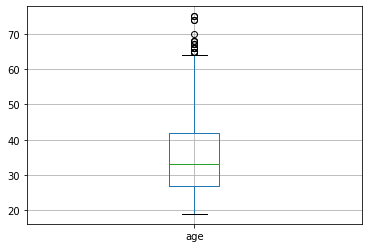



Diagrama para amount


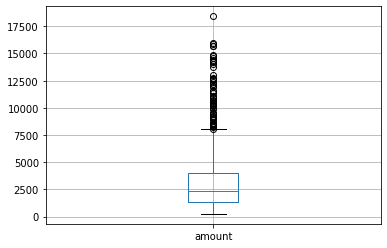



Diagrama para duration


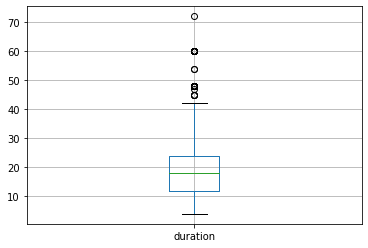

In [18]:
for var in ["age", "amount", "duration"]: #Iteramos sobre cada variable numérica para así construir un boxplot por variable
    print(f"Diagrama para {var}") 
    Xtrain[[var]].boxplot()  #Le decimos a pandas que construya el boxplot para cada variable
    plt.show() #Usamos esta función para "forzar" que se muestre el diagrama, de lo contrario solo aparecerá el último boxplot que se construyó.
    print("\n") #Damos enter para separar un poco los gráficos

In [28]:
#*******************************************************************
#Imputación en variables de entrada para corregir valores perdidos:
#*******************************************************************
#Para las variables numéricas de entrada utilizaremos la media, ya que al no presentar mucha varianza en estas columnas, esta estrategia sería válida.
#Almacenamos las variables numéricas en una lista para mayor facilidad en su uso
XNumericas=["age", "amount", "duration"]
imputer_numericas = SimpleImputer(strategy='mean')
numericas_imputed =  imputer_numericas.fit_transform(Xtrain[XNumericas], Ytrain)

#Para las variables categóricas y ordinales utilizaremos la moda o el valor más frecuente.
#Almacenamos las variables categóricas y ordinales en una lista para mayor facilidad en su uso
XCategoricas=["status","credit_history", "purpose", "savings", "personal_status_sex", "other_debtors",
                                                               "other_installment_plans", "housing"]
imputer_categoricas = SimpleImputer(strategy='most_frequent')
categoricas_imputed = imputer_categoricas.fit_transform(Xtrain[XCategoricas], Ytrain)

#Para las variables binarias utilizaremos la moda o el valor más frecuente.
#Almacenamos las variables binarias en una lista para mayor facilidad en su uso
XBinarias = ["people_liable", "telephone", "foreign_worker"]
imputer_binarias = SimpleImputer(strategy='most_frequent')
binarias_imputed = imputer_categoricas.fit_transform(Xtrain[XBinarias], Ytrain)

binarias_imputed

array([[2, 1, 2],
       [2, 2, 2],
       [2, 1, 2],
       ...,
       [2, 1, 2],
       [2, 2, 2],
       [2, 1, 2]])

#**Ejercicio-4.**

In [ ]:
None

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**